In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open('F:/Learn Python/Data/adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1],
                     chr_int(data1[2]), data1[3],
                     chr_int(data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9], chr_int(data1[10]),
                     chr_int(data1[11]),
                     chr_int(data1[12]),
                     data1[13], data1[14]
                    ])

In [3]:
print (data [1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [4]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt',
    'education', 'education_num', 'marital',
    'occupation', 'relationship', 'race',
    'sex', 'capital_gain', 'capital_loss',
    'hr_per_week', 'country', 'income'
]

In [5]:
df.shape

(32561, 15)

In [6]:
counts = df.groupby('country').size()
print (counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [7]:
m1 = df[(df.sex == 'Male')]

In [8]:
m11 = df[(df.sex == 'Male')&(df.income == '>50K\n')
        ]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female')&(df.income == '>50K\n')]

In [9]:
df1 = df[(df.income == '>50K\n')]
print ('The rate of people with high income is: ',
      int(len(df1)/float(len(df))*100), '%.')
print ('The rste of men with high income is: ',
      int(len(m11)/float(len(df))*100), '%.')
print ('The rate of women with high income is: ',
      int(len(fm1)/float(len(fm))*100), '%.')
       

The rate of people with high income is:  24 %.
The rste of men with high income is:  20 %.
The rate of women with high income is:  10 %.


In [10]:
print ('The average age of men is: ',
      m1['age'].mean())
print ('The average age of women is: ',
      fm['age'].mean())
print ('The average of high-income men is: ',
      m11['age'].mean())
print ('The average of high-income women is: ',
      fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average of high-income men is:  44.62578805163614
The average of high-income women is:  42.125530110262936


In [11]:
m1_mu = m1['age'].mean()
fm_mu = fm['age'].mean()
m1_var = m1['age'].var()
fm_var = fm['age'].var()
m1_std = m1['age'].std()
fm_std = fm['age'].std()
print ('Statistics of age for men: mu:',
      m1_mu, 'var:', m1_var, 'std:',m1_std)
print ('Statistics of age for women: mu:',
      fm_mu, 'var:', fm_var, 'std:', fm_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


In [12]:
m1_median = m1['age'].median()
fm_median = fm['age'].median()
print ('Median age per men and women: ',
      m1_median, fm_median)
m1_median_age = m11['age'].median()
fm_median_age = fm1['age'].median()
print ('Median age per men and women with high-income: ',
      m1_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


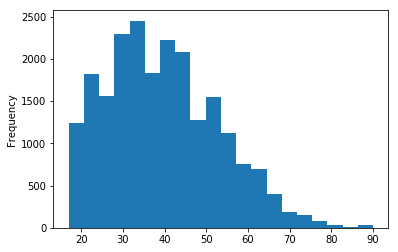

In [13]:
m1_age = m1['age']
m1_age.plot.hist(normed = 0, histtype = 'stepfilled',
           bins = 20)
plt.show()

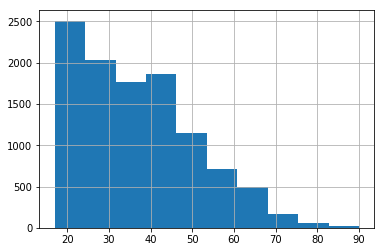

In [14]:
fm_age = fm['age']
fm_age.hist(normed = 0, histtype = 'stepfilled',
           bins = 10)
plt.show()

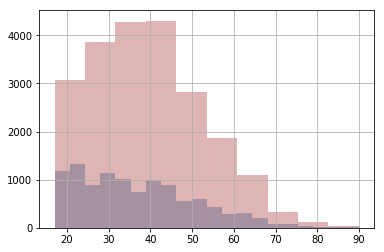

In [15]:
import seaborn as sns
fm_age.hist(normed = 0, histtype ='stepfilled',
           alpha = 0.5, bins = 20)
m1_age.hist(normed = 0, histtype = 'stepfilled',
           alpha = 0.5,
           color = sns.desaturate('indianred',
                                 0.75),
           bins = 10)
plt.show()

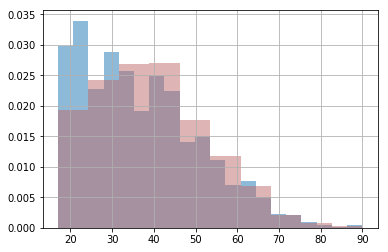

In [16]:
#Prob. Mass Function
import seaborn as sns
fm_age.hist(normed = 1, histtype ='stepfilled',
           alpha = 0.5, bins = 20)
m1_age.hist(normed = 1, histtype = 'stepfilled',
           alpha = 0.5, bins = 10,
           color = sns.desaturate('indianred',
                                 0.75))
plt.show()

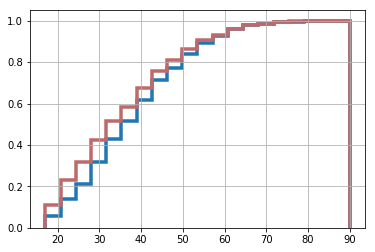

In [17]:
#CDF
import seaborn as sns
m1_age.hist(normed = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20)
fm_age.hist(normed = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20,
           color = sns.desaturate('indianred',0.75))
plt.show()

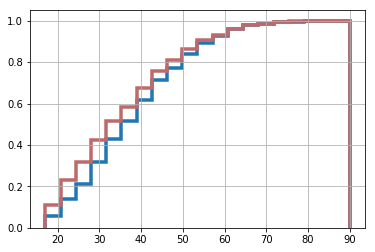

In [18]:
import seaborn as sns
m1_age.hist(normed = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20)
fm_age.hist(normed = 1, histtype = 'step',
           cumulative = True, linewidth = 3.5,
           bins = 20,
           color = sns.desaturate('indianred',0.75))
plt.show()

In [19]:
#outlier
df2 = df.drop(df.index[
    (df.income == '>50K\n') &
    (df['age'] > df['age'].median() + 35) &
    (df['age'] > df['age'].median() - 15)
])
m11_age = m11['age']
fm1_age = fm1['age']

m12_age = m11_age.drop(m11_age.index[
    (m11_age > df['age'].median() + 35) &
    (m11_age > df['age'].median() - 15)
]) 
fm2_age = fm1_age.drop(fm1_age.index[
    (fm1_age > df['age'].median() + 35) &
    (fm1_age > df['age'].median() - 15)
])

In [20]:
#Check how the mean and the median changed once the 
#data were cleaned
mu2m1 = m12_age.mean()
std2m1 = m12_age.std()
md2m1 = m12_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

print ('Men statistics:')
print ('Mean:', mu2m1, 'std:', std2m1)
print ('Median:', md2m1)
print ('Min:', m12_age.min(), 'Max:', m12_age.max())

print ('Women statistics:')
print ('Mean:', mu2fm, 'Std:', std2fm)
print ('Median:', md2fm)
print ('Min:', fm2_age.min(), 'Max:', fm2_age.max())


Men statistics:
Mean: 44.317982123920615 std: 10.019749857171412
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343714
Median: 41.0
Min: 19 Max: 72


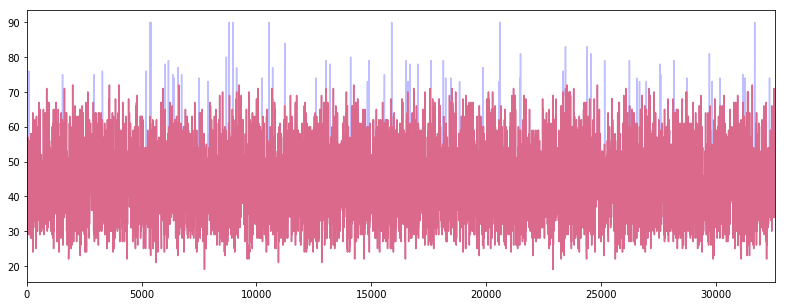

In [21]:
#Visualize how many outliers are removed from data
import matplotlib.pyplot as plt
plt.figure(figsize = (13.4, 5))
df.age[(df.income == '>50K\n')].plot(alpha = 0.25, color = 'blue')
df2.age[(df2.income == '>50K\n')].plot(alpha = 0.45, color = 'red')
plt.show()

In [22]:
#the difference with and without outliers
print ('The mean difference with outliers is: %4.2f.'
      % (m1_age.mean() - fm_age.mean()))
print ('The mean difference without outliers is: %4.2f.'
      % (m12_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


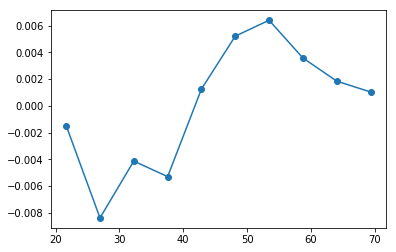

In [23]:
import numpy as np
countx, divisionx = np.histogram(m12_age, normed = True)
county, divisiony = np.histogram(fm2_age, normed = True)
val = [(divisionx[i] + divisiony[i+1])/2 for i in range(len(divisionx) - 1)]
plt.plot(val, countx - county, 'o-')
plt.show()

In [24]:
#beda spasi hati2
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m)*(i-m)*(i-m)
    res /= (len(x)*s*s*s)
    return res
print ('Skewness of the male population = ',
      skewness(m12_age))
print ('skewness of the female population is = ',
      skewness(fm2_age))

Skewness of the male population =  0.266444383843
skewness of the female population is =  0.386333524913


In [25]:
def pearson (x):
    return 3*(x. mean () - x. median ())*x.std ()
print ('Pearson ’s coefficient of the male population = ',
       pearson(m12_age))
print ('Pearson ’s coefficient of the female population = ',
       pearson(fm2_age))


Pearson ’s coefficient of the male population =  9.55830402220993
Pearson ’s coefficient of the female population =  26.40672690728092
